Exercise 2 In this chapter I claimed that the Fourier transform of a Gaussian curve is also a Gaussian curve. For Discrete Fourier Transforms, this relationship is approximately true.
Try it out for a few examples. What happens to the Fourier transform as you vary std?

In [3]:
from __future__ import print_function, division

import thinkdsp
import thinkplot

import numpy as np
import scipy.signal

import warnings
warnings.filterwarnings('ignore')

PI2 = 2 * np.pi

np.set_printoptions(precision=3, suppress=True)
%matplotlib inline

No handles with labels found to put in legend.


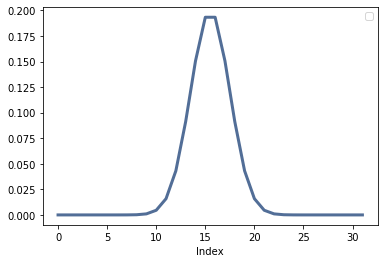

In [4]:
gaussian = scipy.signal.gaussian(M=32, std=2)
gaussian /= sum(gaussian)
thinkplot.plot(gaussian)
thinkplot.config(xlabel='Index')

FFT如下所示：

No handles with labels found to put in legend.


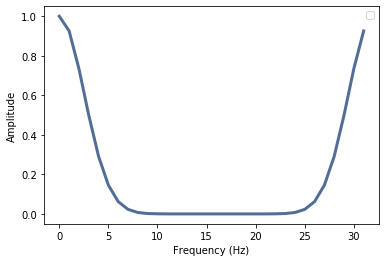

In [5]:
fft_gaussian = np.fft.fft(gaussian)
thinkplot.plot(abs(fft_gaussian))
thinkplot.config(xlabel='Frequency (Hz)', ylabel='Amplitude')

可以清楚地看到它至少是近似高斯的。

No handles with labels found to put in legend.


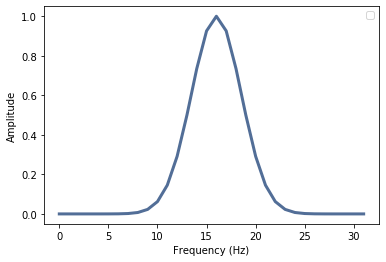

In [6]:
N = len(gaussian)
fft_rolled = np.roll(fft_gaussian, N//2)
thinkplot.plot(abs(fft_rolled))
thinkplot.config(xlabel='Frequency (Hz)', ylabel='Amplitude')

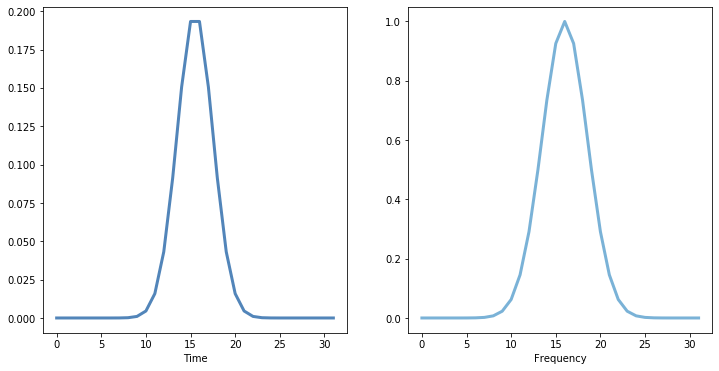

In [7]:
def plot_gaussian(std):
    M = 32
    gaussian = scipy.signal.gaussian(M=M, std=std)
    gaussian /= sum(gaussian)
    
    thinkplot.preplot(num=2, cols=2)
    thinkplot.plot(gaussian)
    thinkplot.config(xlabel='Time', legend=False)

    fft_gaussian = np.fft.fft(gaussian)
    fft_rolled = np.roll(fft_gaussian, M//2)
    
    thinkplot.subplot(2)
    thinkplot.plot(abs(fft_rolled))
    thinkplot.config(xlabel='Frequency')

    
plot_gaussian(2)

顯示隨著std變化而發生的情況。

In [8]:
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

slider = widgets.FloatSlider(min=0.1, max=10, value=2)
interact(plot_gaussian, std=slider);

interactive(children=(FloatSlider(value=2.0, description='std', max=10.0, min=0.1), Output()), _dom_classes=('…

Exercise 3 If you did the exercises in Chapter 3, you saw the effect of the Hamming window, and some of the other windows provided by NumPy, on spectral leakage. We can get some insight into the effect of these windows by looking at their DFTs.
In addition to the Gaussian window we used in this chapter, create a Hamming window with the same size. Zero-pad the windows and plot their DFTs. Which window acts as a better low-pass filter? You might find it useful to plot the DFTs on a log-y scale.
Experiment with a few different windows and a few different sizes.

In [9]:
signal = thinkdsp.SquareSignal(freq=440)
wave = signal.make_wave(duration=1.0, framerate=44100)

In [10]:
M = 15
std = 2.5

gaussian = scipy.signal.gaussian(M=M, std=std)   
bartlett = np.bartlett(M)
blackman = np.blackman(M)
hamming = np.hamming(M)
hanning = np.hanning(M)

windows = [gaussian, blackman, hamming, hanning]
names = ['gaussian', 'blackman', 'hamming', 'hanning']

for window in windows:
    window /= sum(window)

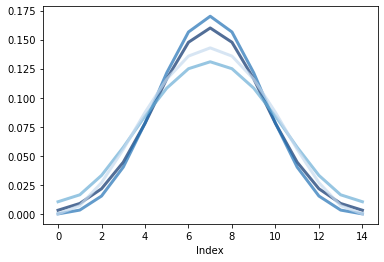

In [11]:
thinkplot.preplot(4)
for window, name in zip(windows, names):
    thinkplot.plot(window, label=name)

thinkplot.config(xlabel='Index', legend=True, loc='center bottom')

很相似。

In [12]:
def plot_window_dfts(windows, names):
    thinkplot.preplot(5)

    for window, name in zip(windows, names):
        padded = thinkdsp.zero_pad(window, len(wave))
        dft_window = np.fft.rfft(padded)
        thinkplot.plot(abs(dft_window), label=name)

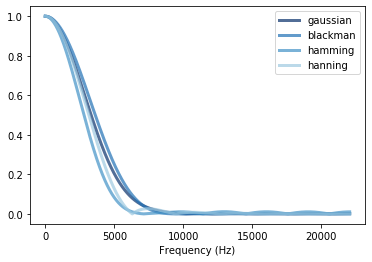

In [13]:
plot_window_dfts(windows, names)
thinkplot.config(xlabel='Frequency (Hz)', loc='upper right')

可以看到Hamming 和 Hanning的下降速度比其他兩個起初更快。

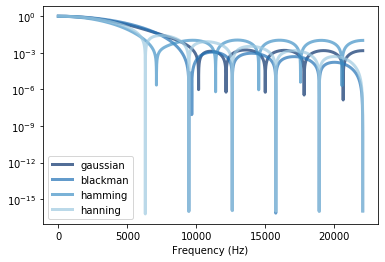

In [14]:
plot_window_dfts(windows, names)
thinkplot.config(xlabel='Frequency (Hz)', yscale='log', 
                 loc='lower left')